**IMPORT CSV**

In [2]:
import geopandas as gpd
import pandas as pd

In [3]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/iklim/kelembaban/nc_to_csv/rh_satuan.csv')

**SET THE TIME TO .DATETIME FORMAT**

In [25]:
# overwriting data after changing format
df_csv['time']= pd.to_datetime(df_csv['time'])
 
# info of data
df_csv.info()
 
# display
print(df_csv.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54000 entries, 0 to 53999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  54000 non-null  int64         
 1   time        54000 non-null  datetime64[ns]
 2   latitude    54000 non-null  float64       
 3   longitude   54000 non-null  float64       
 4   d2m         54000 non-null  float64       
 5   t2m         54000 non-null  float64       
 6   RH          54000 non-null  float64       
 7   month       54000 non-null  int32         
 8   year        54000 non-null  int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(1)
memory usage: 3.3 MB
   Unnamed: 0       time  latitude  longitude        d2m        t2m  \
0           0 2018-01-01      -7.0     106.00  23.864685  26.465942   
1           1 2018-01-01      -7.0     106.05  23.745544  26.282355   
2           2 2018-01-01      -7.0     106.10  23.626404  26.098767   
3

In [26]:
df_csv['month'] = df_csv['time'].dt.month

In [27]:
df_csv['year'] = df_csv['time'].dt.year

**IMPORT SHP FILE**

In [28]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp")

**CREATE GEOMETRY FROM SHP AND CSV**

In [29]:
geometry = gpd.points_from_xy(df_csv['longitude'], df_csv['latitude'])
gdf_csv = gpd.GeoDataFrame(df_csv, geometry=geometry, crs='EPSG:4326')

<Axes: >

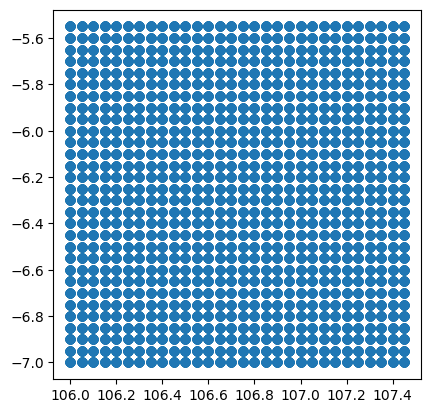

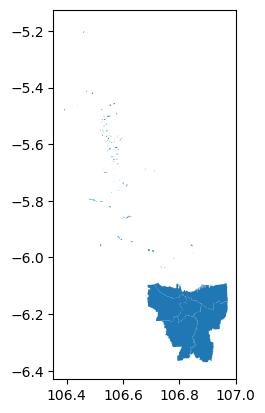

In [30]:
gdf_csv.plot()
gdf_shapefile.plot()

In [10]:
gdf_csv

,Unnamed: 0,time,latitude,longitude,d2m,t2m,RH,month,year,geometry
0,0,2018-01-01,-7.00,106.00,23.864685,26.465942,86.993713,1,2018,POINT (106.00000 -7.00000)
1,1,2018-01-01,-7.00,106.05,23.745544,26.282355,87.315948,1,2018,POINT (106.05000 -7.00000)
2,2,2018-01-01,-7.00,106.10,23.626404,26.098767,87.638184,1,2018,POINT (106.10000 -7.00000)
3,3,2018-01-01,-7.00,106.15,23.507263,25.915179,87.960419,1,2018,POINT (106.15000 -7.00000)
4,4,2018-01-01,-7.00,106.20,23.388123,25.731592,88.282654,1,2018,POINT (106.20000 -7.00000)
...,...,...,...,...,...,...,...,...,...,...
53995,53995,2022-12-01,-5.55,107.25,23.895770,27.282721,83.065247,12,2022,POINT (107.25000 -5.55000)
53996,53996,2022-12-01,-5.55,107.30,23.902406,27.287870,83.072681,12,2022,POINT (107.30000 -5.55000)
53997,53997,2022-12-01,-5.55,107.35,23.909042,27.293019,83.080115,12,2022,POINT (107.35000 -5.55000)
53998,53998,2022-12-01,-5.55,107.40,23.915677,27.298168,83.087549,12,2022,POINT (107.40000 -5.55000)


In [11]:
#join all the variables
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')

#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'RH', 'KABKOT', 'geometry', 'time']]

In [24]:
result

,Unnamed: 0,time,latitude,longitude,d2m,t2m,RH,month,year,geometry,index_right,PROVNO,KABKOTNO,PROVINSI,KABKOT
406,406,2018-01-01,-6.35,106.80,22.801985,26.267634,82.671753,1,2018,POINT (106.80000 -6.35000),1,31,71,DKI JAKARTA,JAKARTA SELATAN
436,436,2018-01-01,-6.30,106.80,23.029423,26.592954,82.182343,1,2018,POINT (106.80000 -6.30000),1,31,71,DKI JAKARTA,JAKARTA SELATAN
437,437,2018-01-01,-6.30,106.85,23.031678,26.599690,82.159943,1,2018,POINT (106.85000 -6.30000),1,31,71,DKI JAKARTA,JAKARTA SELATAN
465,465,2018-01-01,-6.25,106.75,23.257263,26.915131,81.710663,1,2018,POINT (106.75000 -6.25000),1,31,71,DKI JAKARTA,JAKARTA SELATAN
466,466,2018-01-01,-6.25,106.80,23.256860,26.918274,81.692932,1,2018,POINT (106.80000 -6.25000),1,31,71,DKI JAKARTA,JAKARTA SELATAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53628,53628,2022-12-01,-6.15,106.90,23.607396,26.989448,83.089740,12,2022,POINT (106.90000 -6.15000),5,31,75,DKI JAKARTA,JAKARTA UTARA
53629,53629,2022-12-01,-6.15,106.95,23.623245,26.997416,83.129144,12,2022,POINT (106.95000 -6.15000),5,31,75,DKI JAKARTA,JAKARTA UTARA
53656,53656,2022-12-01,-6.10,106.80,23.662338,27.081412,82.904626,12,2022,POINT (106.80000 -6.10000),5,31,75,DKI JAKARTA,JAKARTA UTARA
53658,53658,2022-12-01,-6.10,106.90,23.693873,27.108434,82.927197,12,2022,POINT (106.90000 -6.10000),5,31,75,DKI JAKARTA,JAKARTA UTARA


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1440 entries, 406 to 53659
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  1440 non-null   float64       
 1   latitude   1440 non-null   float64       
 2   month      1440 non-null   int32         
 3   year       1440 non-null   int32         
 4   RH         1440 non-null   float64       
 5   KABKOT     1440 non-null   object        
 6   geometry   1440 non-null   geometry      
 7   time       1440 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(1)
memory usage: 90.0+ KB


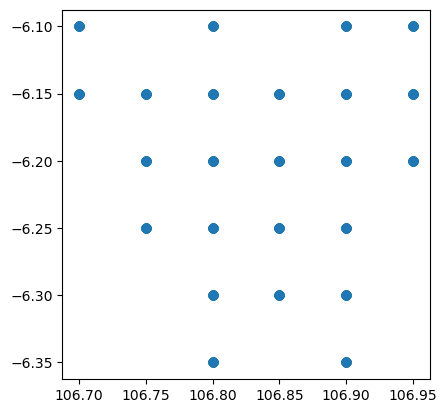

In [31]:
result_pop.plot()
result_pop.info()

**SHOW THE COLUMNS**

In [13]:
#input the columns to get the RH average/month
dissolved_result = result_pop.dissolve(by=['KABKOT','month'], aggfunc='mean')

dissolved_result.reset_index(inplace=True)
dissolved_result.head()

,KABKOT,month,geometry,longitude,latitude,year,RH,time
0,JAKARTA BARAT,1,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,2020.0,84.136462,2020-01-01 09:36:00
1,JAKARTA BARAT,2,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,2020.0,85.301538,2020-02-01 09:36:00
2,JAKARTA BARAT,3,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,2020.0,83.478376,2020-02-29 14:24:00
3,JAKARTA BARAT,4,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,2020.0,83.119352,2020-03-31 14:24:00
4,JAKARTA BARAT,5,"MULTIPOINT ((106.70000 -6.15000), (106.70000 -...",106.75,-6.158333,2020.0,81.919704,2020-04-30 14:24:00


In [14]:
#download data to .csv format
dissolved_result.to_csv('rh_all_month.csv')

**SET FOR MAPPING**

In [15]:
# ubah per month
import pandas as pd

In [16]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [17]:
dissolved_result_df = dissolved_result_df.sort_values(by=['KABKOT', 'month'])

In [18]:
#download data to .csv format
dissolved_result_df.to_csv('rh_kabkot_month.csv')

In [19]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
print(polygon_result.columns)

Index(['PROVNO', 'KABKOTNO', 'PROVINSI', 'KABKOT_left', 'geometry',
       'index_right', 'KABKOT_right', 'month', 'longitude', 'latitude', 'year',
       'RH', 'time'],
      dtype='object')


**MAPPING**

In [20]:
import calendar
import matplotlib.pyplot as plt

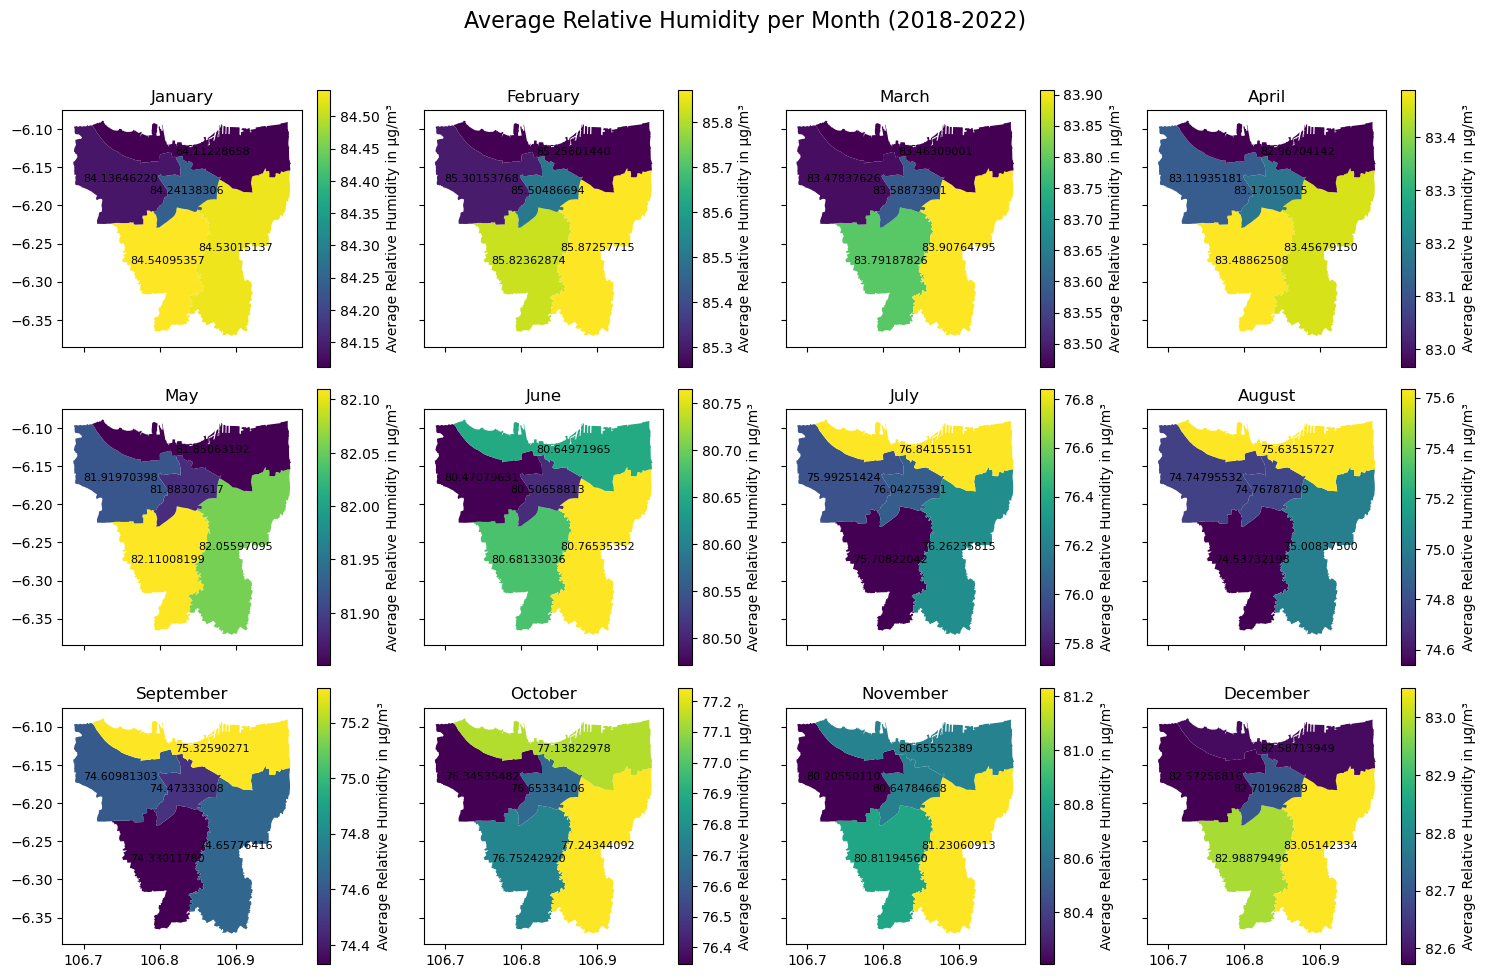

In [21]:
# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Average Relative Humidity per Month (2018-2022)', fontsize=16)

# Iterate through each month and plot the data
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month
    data_monthly = polygon_result[polygon_result['month'] == month]

    # Plot the map for the current month
    data_monthly.plot(ax=ax, column="RH", legend=True, legend_kwds={"label": "Average Relative Humidity in µg/m³"})

    # Annotate each polygon with average RH value
    for idx, row in data_monthly.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['RH']:.8f}", fontsize=8, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Menggunakan modul calendar untuk mendapatkan nama bulan

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# If u want to change the color, use this script
# The colors are limited based on cmap
# Put these script before plt.show()
cmap = plt.get_cmap('plasma')
plt.set_cmap(cmap)

# Show the plot
plt.show()

**GRAPHS**

In [22]:
import calendar

# Format for monthly graph
dissolved_result_df['month_name'] = pd.to_datetime(dissolved_result_df['month'], format='%m').dt.month_name()

# Set the ['month_name'] as an index
dissolved_result_df= dissolved_result_df.set_index('month_name')

JAKARTA BARAT
                   KABKOT  month  longitude  latitude    year         RH  \
month_name                                                                 
January     JAKARTA BARAT      1     106.75 -6.158333  2020.0  84.136462   
February    JAKARTA BARAT      2     106.75 -6.158333  2020.0  85.301538   
March       JAKARTA BARAT      3     106.75 -6.158333  2020.0  83.478376   
April       JAKARTA BARAT      4     106.75 -6.158333  2020.0  83.119352   
May         JAKARTA BARAT      5     106.75 -6.158333  2020.0  81.919704   
June        JAKARTA BARAT      6     106.75 -6.158333  2020.0  80.470796   
July        JAKARTA BARAT      7     106.75 -6.158333  2020.0  75.992514   
August      JAKARTA BARAT      8     106.75 -6.158333  2020.0  74.747955   
September   JAKARTA BARAT      9     106.75 -6.158333  2020.0  74.609813   
October     JAKARTA BARAT     10     106.75 -6.158333  2020.0  76.345355   
November    JAKARTA BARAT     11     106.75 -6.158333  2020.0  80.205501  

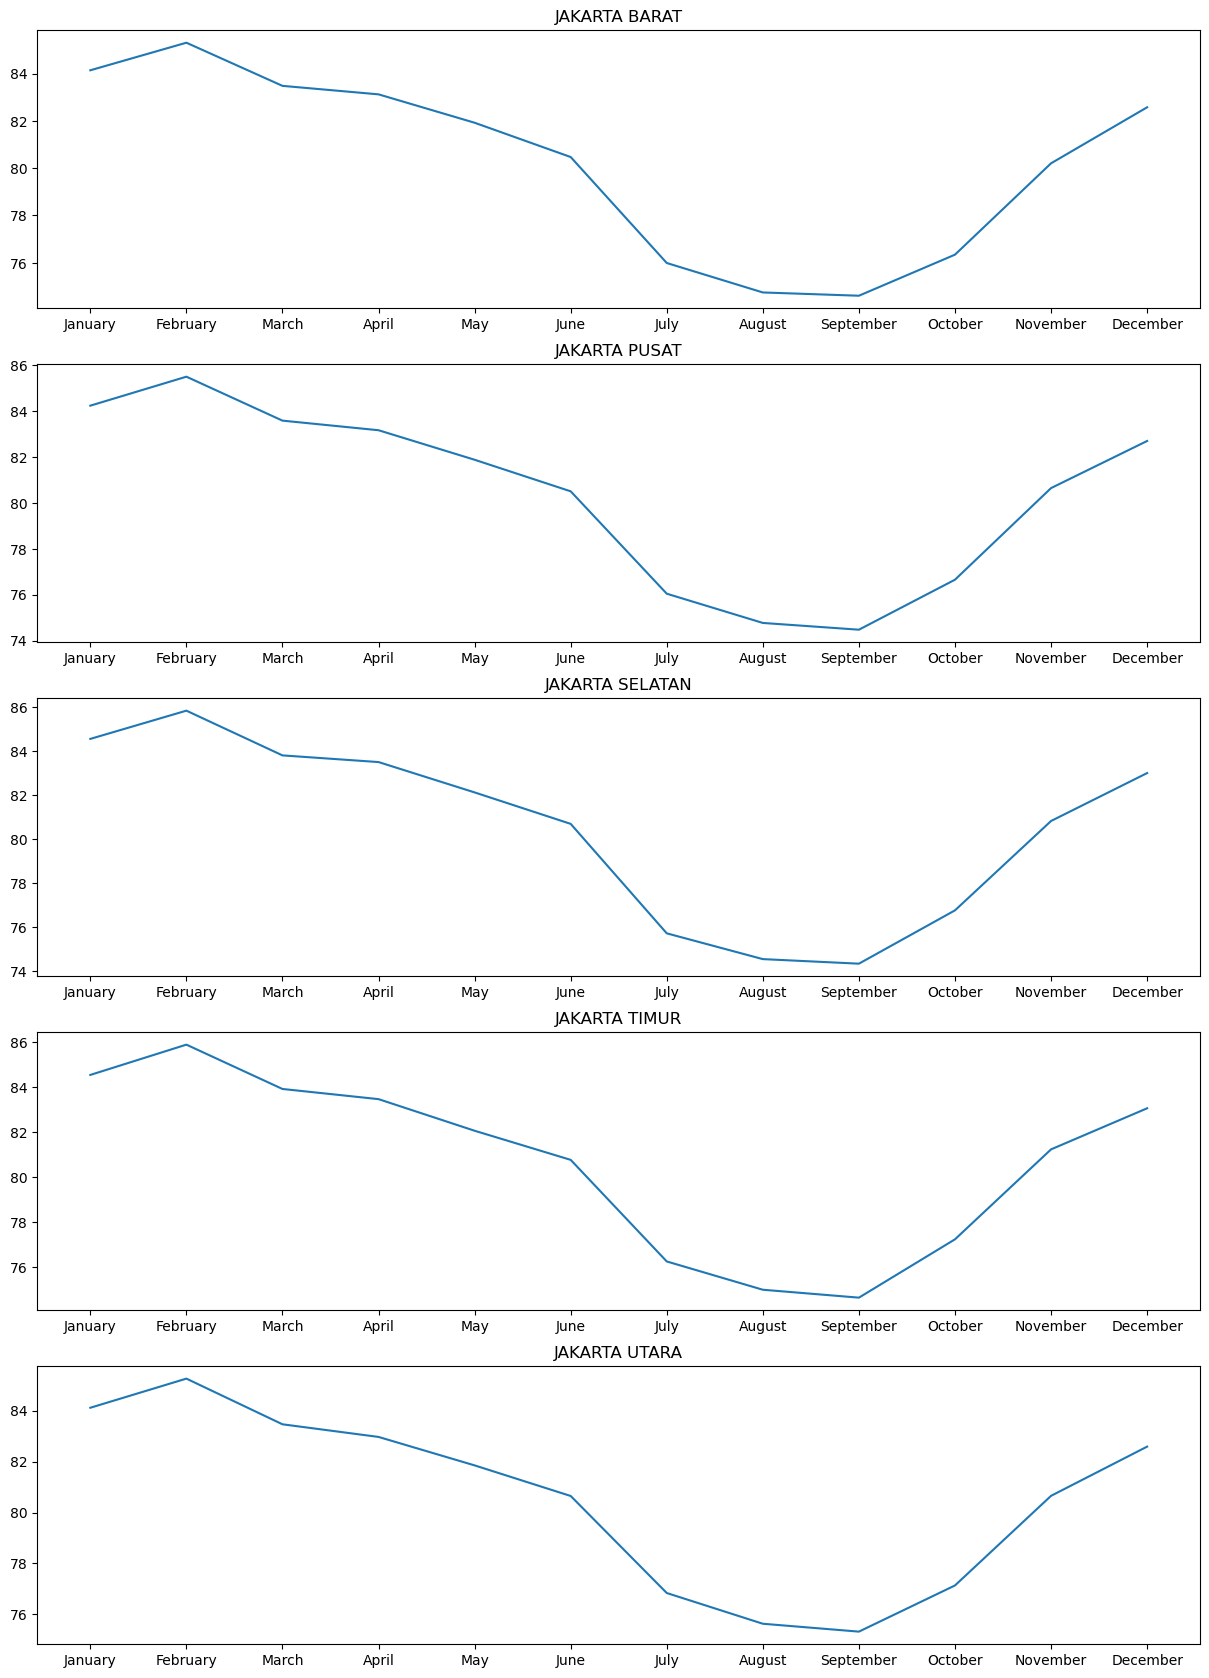

In [23]:
fig  = plt.figure(figsize=(15,60))
cities = list(dissolved_result_df['KABKOT'].unique())
# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['KABKOT'] == city]
    print(city)
    print(data_city)
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['RH'])
    plt.title(city)
    #ax.set_title(f'{city}')